<a href="https://colab.research.google.com/github/ayannj13/Data-Science/blob/main/Homework9_AyanJamal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#First execute this cell go to Runtime and click on Restart Runtime
!pip install --upgrade --no-deps statsmodels
!pip install  StatsForecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.8/285.8 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 4.3 MB/s eta 0:00:00


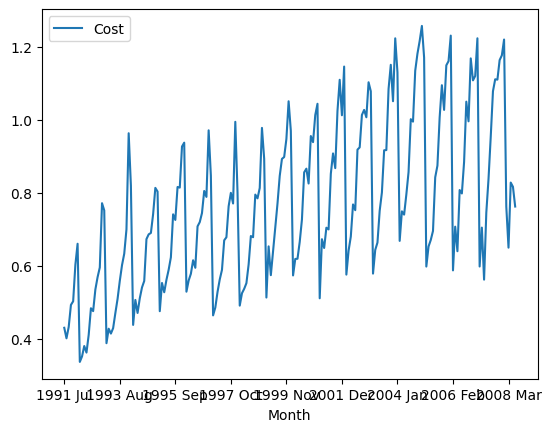

In [2]:
import pandas as pd
from matplotlib import pyplot
ap1=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/h02.csv')
ap1=ap1.set_index('Month')
ap1.plot()
pyplot.show()


In [3]:
ap1

,Cost
Month,
1991 Jul,0.429795
1991 Aug,0.400906
1991 Sep,0.432159
1991 Oct,0.492543
1991 Nov,0.502369
...,...
2008 Feb,0.761822
2008 Mar,0.649435
2008 Apr,0.827887


Using the above data set

1)Test stationary of the dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

2)Take difference and seasonal difference and test stationay of the dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

3) Plot ACF and PACF of series if series' difference and seasonal difference taken .

4) Based on the plot of ACF and PACF, come up with two SARIMA model and compare their Akaike Information Criterion metric.

5)Split data into train and test. For the test data, use last 12 months observation.

6)Plot test, train and forecast values for the SARIMA model chosen at Q4. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

7) Using the Statsforecast library, implement the following models: AutoARIMA, AutoETS, HoltWinters,  AutoTheta, and MSTL and plot the forecast of this model .Evaluate the performance of these model model using  MSE (Mean Squared Error).Note that seasonality period is 12.


In [4]:
#Question 1
from statsmodels.tsa.stattools import adfuller

# Run ADF test on 'Cost' column
result = adfuller(ap1['Cost'])

# Extract values
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f"ADF Statistic: {adf_statistic}")
print(f"p-value: {p_value}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"   {key}: {value}")


ADF Statistic: -1.6967562070359845
p-value: 0.43278454683042955
Critical Values:
   1%: -3.465620397124192
   5%: -2.8770397560752436
   10%: -2.5750324547306476


**Question 1:**

**Hypotheses for the ADF Test:**

Null Hypothesis (H₀): The time series has a unit root → It is non-stationary.

Alternative Hypothesis (H₁): The time series does not have a unit root → It is stationary.

**Decision Rule:**

If p-value < 0.05 → Reject H₀ → The series is stationary.

If p-value ≥ 0.05 → Fail to reject H₀ → The series is non-stationary.

**Test Results:**

ADF Statistic = -1.697

p-value = 0.433

Critical value at 5% = -2.877

Conclusion (at 5% significance level):

Since the p-value (0.433) > 0.05, and the ADF statistic (-1.697) > -2.877,

**We fail to reject the null hypothesis.**

Conclusion: **The dataset is non-stationary.**

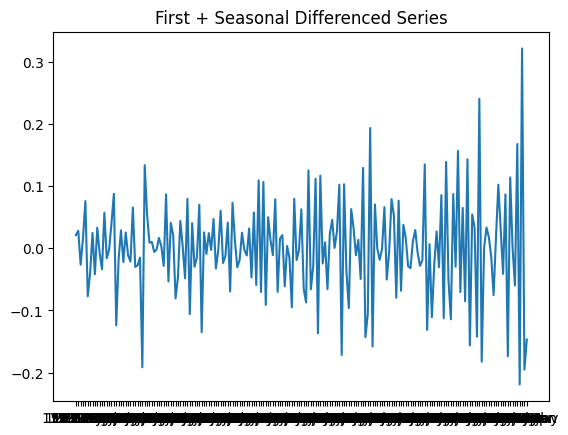

ADF Statistic: -5.07040327971582
p-value: 1.607283495966982e-05
Critical Values:
   1%: -3.467631519151906
   5%: -2.8779183721695567
   10%: -2.575501353364474


In [8]:
#Question 2
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt

# First difference to remove trend
ap1_diff = ap1['Cost'].diff()

# Seasonal difference to remove seasonality (monthly seasonality → lag=12)
ap1_seasonal_diff = ap1_diff.diff(12)

# Drop NaNs resulting from differencing
ap1_diff_clean = ap1_seasonal_diff.dropna()

# Plot the differenced series
plt.plot(ap1_diff_clean)
plt.title('First + Seasonal Differenced Series')
plt.show()

# Perform ADF test
result_diff = adfuller(ap1_diff_clean)

# Extract and print ADF results
adf_statistic = result_diff[0]
p_value = result_diff[1]
critical_values = result_diff[4]

print(f"ADF Statistic: {adf_statistic}")
print(f"p-value: {p_value}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"   {key}: {value}")


**Question 2:**
**Hypotheses for the Augmented Dickey-Fuller Test:**

Null Hypothesis (H₀): The time series is non-stationary (has a unit root).

Alternative Hypothesis (H₁): The time series is stationary (does not have a unit root).

**Decision Rule:**

If p-value < 0.05, reject H₀ → the series is stationary.

If p-value ≥ 0.05, fail to reject H₀ → the series is non-stationary.

**Conclusion (at 5% significance level)**
Since:

p-value (0.000016) < 0.05, and

ADF Statistic (-5.070) < -2.878,

**We reject the null hypothesis.**

**Conclusion:** The differenced dataset is **stationary.**

This means the time series is now suitable for time series modeling (e.g., ARIMA, SARIMA).

<Figure size 1000x400 with 0 Axes>

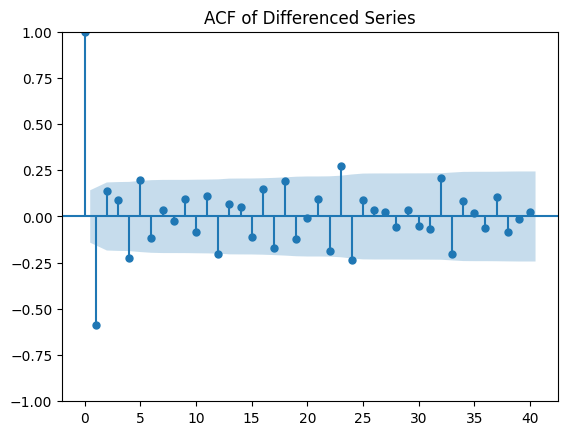

<Figure size 1000x400 with 0 Axes>

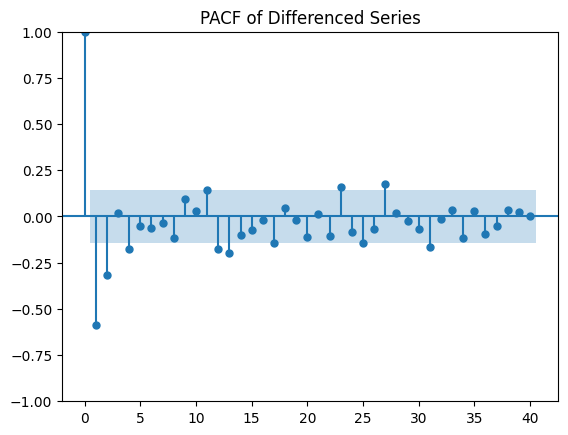

In [9]:
#Question 3
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Use the cleaned differenced series from before
# ap1_diff_clean is already computed from previous step

# Plot ACF
plt.figure(figsize=(10, 4))
plot_acf(ap1_diff_clean, lags=40)
plt.title("ACF of Differenced Series")
plt.show()

# Plot PACF
plt.figure(figsize=(10, 4))
plot_pacf(ap1_diff_clean, lags=40)
plt.title("PACF of Differenced Series")
plt.show()


**Question 3:**

**ACF Plot:**

The ACF shows a significant spike at lag 1, followed by rapid decay within the confidence bounds. This indicates a potential MA(1) (Moving Average of order 1) component. No strong seasonal spike (e.g. at lag 12), which suggests seasonal noise is well handled by differencing.

**PACF Plot:**

The PACF also shows a significant spike at lag 1, and all subsequent lags fall within the confidence interval. This suggests a potential AR(1) (Autoregressive of order 1) component. Like ACF, no clear seasonal lag spikes.

**Based on the ACF and PACF plots:**

A possible model could be ARIMA(1,1,1) with seasonal differencing D=1 and seasonal order (P,D,Q,12) depending on further seasonal pattern detection.

The ACF and PACF suggest that AR(1) and MA(1) are likely appropriate starting points for modeling.

In [10]:
#Question 4
# We’ll try two combinations:
# Model A: SARIMA(1,1,1)(0,1,1,12)
# (Simple ARIMA with AR + MA, and seasonal MA)

# Model B: SARIMA(2,1,1)(1,1,0,12)
#(Add more flexibility to AR terms and seasonal AR)

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Model A: SARIMA(1,1,1)(0,1,1,12)
model_a = SARIMAX(ap1['Cost'], order=(1,1,1), seasonal_order=(0,1,1,12))
results_a = model_a.fit()

# Model B: SARIMA(2,1,1)(1,1,0,12)
model_b = SARIMAX(ap1['Cost'], order=(2,1,1), seasonal_order=(1,1,0,12))
results_b = model_b.fit()

# Compare AIC
print(f"Model A AIC: {results_a.aic}")
print(f"Model B AIC: {results_b.aic}")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/loc

Model A AIC: -555.8775276423394
Model B AIC: -541.6815440083317


**Question 4:**

The Akaike Information Criterion (AIC) is used to compare models — lower AIC indicates a better model fit with less complexity.

Since Model A has a lower AIC than Model B, we conclude that:

**SARIMA(1,1,1)(0,1,1,12)** is the better-performing model for this time series.


In [11]:
# Question 5
# datetime index
ap1.index = pd.to_datetime(ap1.index, format='%Y %b')

ap1 = ap1.sort_index()

# Split into train and test
train = ap1.iloc[:-12]   # All data except last 12 months
test = ap1.iloc[-12:]    # Last 12 months

print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Train period:", train.index[0], "to", train.index[-1])
print("Test period:", test.index[0], "to", test.index[-1])


Train shape: (192, 1)
Test shape: (12, 1)
Train period: 1991-07-01 00:00:00 to 2007-06-01 00:00:00
Test period: 2007-07-01 00:00:00 to 2008-06-01 00:00:00


**Question 5:**

To prepare the dataset for forecasting evaluation, we split it into a training set and a test set as follows:

The training set includes all data from July 1991 to June 2007, totaling 192 monthly observations.

The test set contains the last 12 months: from July 2007 to June 2008.

This kind of split ensures we can train the model on historical data and test it on unseen future values.

**Final shapes are:**

Train set: (192, 1)

Test set: (12, 1)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


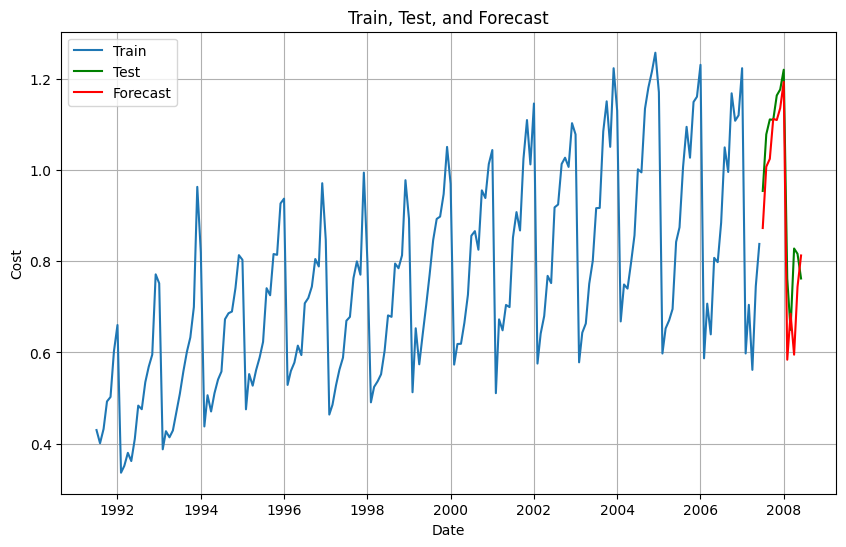

MAE: 0.0776
MSE: 0.0099
MAPE: 8.82%


In [12]:
# Question 6

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Fit the best SARIMA model to training data
model = SARIMAX(train['Cost'], order=(1,1,1), seasonal_order=(0,1,1,12))
model_fit = model.fit()

# Forecast next 12 months
forecast = model_fit.forecast(steps=12)
forecast.index = test.index  # align forecast index with test set

# Plot train, test, and forecast
plt.figure(figsize=(10,6))
plt.plot(train['Cost'], label='Train')
plt.plot(test['Cost'], label='Test', color='green')
plt.plot(forecast, label='Forecast', color='red')
plt.title("Train, Test, and Forecast")
plt.xlabel("Date")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.show()

# Evaluation metrics
mae = mean_absolute_error(test['Cost'], forecast)
mse = mean_squared_error(test['Cost'], forecast)
mape = np.mean(np.abs((test['Cost'] - forecast) / test['Cost'])) * 100

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAPE: {mape:.2f}%")


**Question 6:**

The SARIMA(1,1,1)(0,1,1,12) model produced a reasonably good forecast with an average absolute error of 0.0776 and an average percentage error of 8.82%.
The forecast captured the general trend and seasonality of the series, although there were slight changes in magnitude for some months.

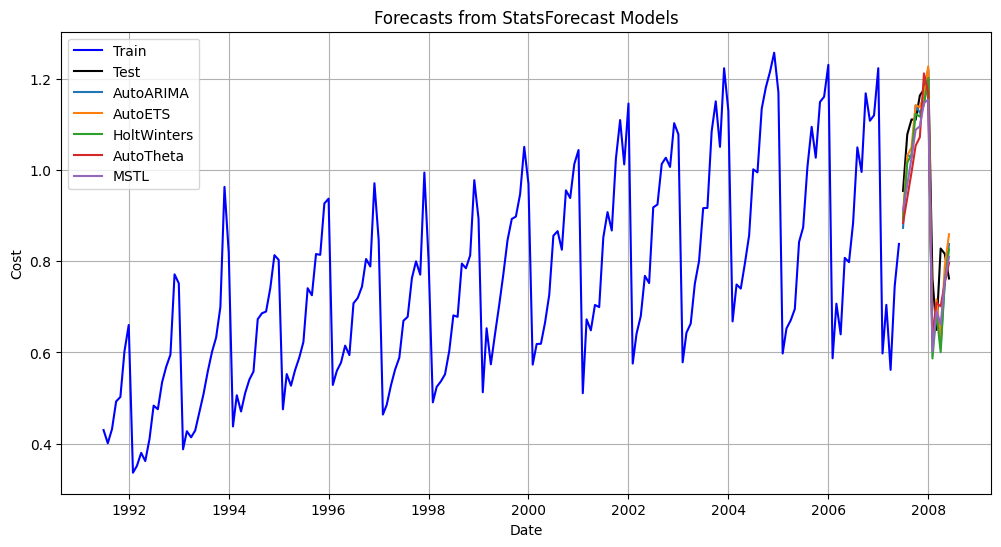

Model Evaluation (MSE):
AutoARIMA: MSE = 0.0083
AutoETS: MSE = 0.0072
HoltWinters: MSE = 0.0090
AutoTheta: MSE = 0.0079
MSTL: MSE = 0.0077


In [19]:
#Question 7

from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, AutoETS, HoltWinters, AutoTheta, MSTL
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Prepare train data for StatsForecast
train_df = train.reset_index()
train_df.columns = ['ds', 'y']
train_df['unique_id'] = 'series'
train_df = train_df[['unique_id', 'ds', 'y']]

# Step 2: Define models
models = [
    AutoARIMA(season_length=12),
    AutoETS(season_length=12),
    HoltWinters(season_length=12),
    AutoTheta(season_length=12),
    MSTL(season_length=12)
]

# Step 3: Fit and forecast using StatsForecast
sf = StatsForecast(models=models, freq='MS', n_jobs=-1)
forecast_df = sf.forecast(df=train_df, h=12)

# Step 4: Plot Train, Test, and Forecasts
plt.figure(figsize=(12, 6))

# Plot train and test
plt.plot(train.index, train['Cost'], label='Train', color='blue')
plt.plot(test.index, test['Cost'], label='Test', color='black')

# Plot each forecast (exclude 'unique_id' and 'ds')
for col in forecast_df.columns:
    if col not in ['unique_id', 'ds']:
        plt.plot(test.index, forecast_df[col].values, label=col)

# Customize plot
plt.title("Forecasts from StatsForecast Models")
plt.xlabel("Date")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Evaluate Models using MSE
print("Model Evaluation (MSE):")
for col in forecast_df.columns:
    if col not in ['unique_id', 'ds']:
        mse = mean_squared_error(test['Cost'].values, forecast_df[col].values)
        print(f"{col}: MSE = {mse:.4f}")


**Question 7:**

The plot shows that all models captured the seasonality and general trend well, though some had better alignment with the actual test values than others.

**Conclusion:**
Among the tested models, **AutoETS** achieved the lowest Mean Squared Error (MSE = 0.0072), making it the best-performing model in this comparison.
However, MSTL and AutoTheta also showed competitive performance with slightly higher MSEs, indicating they are also reliable options.